In [36]:
import pandas as pd

In [37]:
url1=pd.read_csv('/content/sms_spam.csv')

In [38]:
url1.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [39]:
url2=pd.read_csv('/content/email 123.csv')

In [40]:
url2.head()

,Text,type
0,naturally irresistible your corporate identit...,spam
1,the stock trading gunslinger fanny is merril...,spam
2,unbelievable new homes made easy im wanting ...,spam
3,4 color printing special request additional ...,spam
4,"do not have money , get software cds from her...",spam


In [41]:
newurl2 = url2[['Text', 'type']]

In [42]:
newurl2.head()

,Text,type
0,naturally irresistible your corporate identit...,spam
1,the stock trading gunslinger fanny is merril...,spam
2,unbelievable new homes made easy im wanting ...,spam
3,4 color printing special request additional ...,spam
4,"do not have money , get software cds from her...",spam


In [43]:
url3=pd.read_csv('/content/spam.csv',encoding=('ISO-8859-1'))

In [44]:
url3.head()

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
newurl3=url3[['type','text']]

In [46]:
newurl3.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
display(url1.shape,newurl2.shape,newurl3.shape)

(5559, 2)

(5726, 2)

(5572, 2)

In [48]:
df=pd.concat([url1,newurl2,newurl3])
df.shape

(16857, 3)

In [49]:
df.head()

,type,text,Text
0,ham,Hope you are having a good week. Just checking in,NaN
1,ham,K..give back my thanks.,NaN
2,ham,Am also doing in cbe only. But have to pay.,NaN
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",NaN
4,spam,okmail: Dear Dave this is your final notice to...,NaN


In [50]:
df=df.drop(columns=['Text'])

In [51]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [52]:
df.shape

(16857, 2)

In [53]:
df.sample(5)

,type,text
2057,ham,NaN
692,ham,"My sister in law, hope you are having a great ..."
717,ham,Book which lesson? then you msg me... I will c...
2303,spam,Great News! Call FREEFONE 08006344447 to claim...
1827,ham,I can't describe how lucky you are that I'm ac...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16857 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    16857 non-null  object
 1   text    11131 non-null  object
dtypes: object(2)
memory usage: 395.1+ KB


In [55]:
df.rename(columns={'type':'target'},inplace=True)
df.sample(5)

,target,text
2504,ham,"Hello, my boytoy! I made it home and my consta..."
5389,ham,Life style garments account no please.
9,ham,"fyi I'm at usf now, swing by the room whenever"
3293,ham,Beautiful tomorrow never comes.. When it comes...
214,ham,Sounds great! Are you home now?


In [56]:
unique_categories = df['target'].unique()

# Print the unique categories
print("Unique categories in 'target':")
print(unique_categories)

Unique categories in 'target':
['ham' 'spam']


In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [58]:
df['target'] = encoder.fit_transform(df['target'])

In [59]:
df.head()

,target,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [60]:
df['target'].unique()

array([0, 1])

In [61]:
df.isnull().sum()

target       0
text      5726
dtype: int64

In [62]:
df.duplicated().sum()

10789

In [63]:
df = df.drop_duplicates(keep='first')

In [64]:
df.duplicated().sum()

0

In [65]:
df.isnull().sum()

target    0
text      2
dtype: int64

In [66]:
df.shape

(6068, 2)

In [67]:
df.shape

(6068, 2)

In [68]:
df['target'].unique()

array([0, 1])

In [69]:
df['target'].value_counts()

0    5184
1     884
Name: target, dtype: int64

In [70]:
df['target'].value_counts()

0    5184
1     884
Name: target, dtype: int64

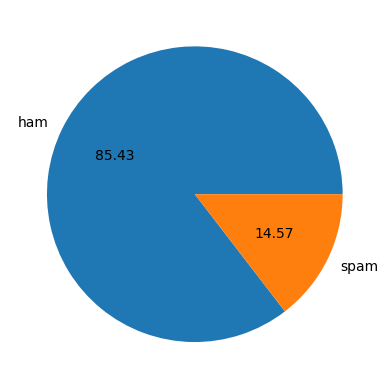

In [71]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [72]:
import nltk

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [74]:
df['text']

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
3       complimentary 4 STAR Ibiza Holiday or £10,000 ...
4       okmail: Dear Dave this is your final notice to...
                              ...                        
5557    No. I meant the calculation is the same. That ...
5559    if you aren't here in the next  &lt;#&gt;  hou...
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5570    The guy did some bitching but I acted like i'd...
Name: text, Length: 6068, dtype: object

In [75]:
df['text'].dtype

dtype('O')

In [76]:
df['text'] = df['text'].astype(str)

In [77]:
df['num_characters'] = df['text'].apply(len)

In [78]:
df.head()

,target,text,num_characters
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,1,okmail: Dear Dave this is your final notice to...,161


In [79]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [80]:
df.head()

,target,text,num_characters,num_words
0,0,Hope you are having a good week. Just checking in,49,11
1,0,K..give back my thanks.,23,7
2,0,Am also doing in cbe only. But have to pay.,43,12
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23
4,1,okmail: Dear Dave this is your final notice to...,161,32


In [81]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [82]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6068.000000,6068.000000,6068.000000
mean,83.283784,19.316414,2.026862
std,60.492944,13.703797,1.571473
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,65.000000,16.000000,2.000000
75%,126.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [83]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5184.000000,5184.000000,5184.000000
mean,73.719907,17.835648,1.854360
std,59.291269,14.040115,1.511742
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,55.000000,14.000000,1.000000
75%,96.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [84]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,884.000000,884.000000,884.000000
mean,139.368778,28.000000,3.038462
std,28.676778,6.698828,1.534316
min,3.000000,1.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [85]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

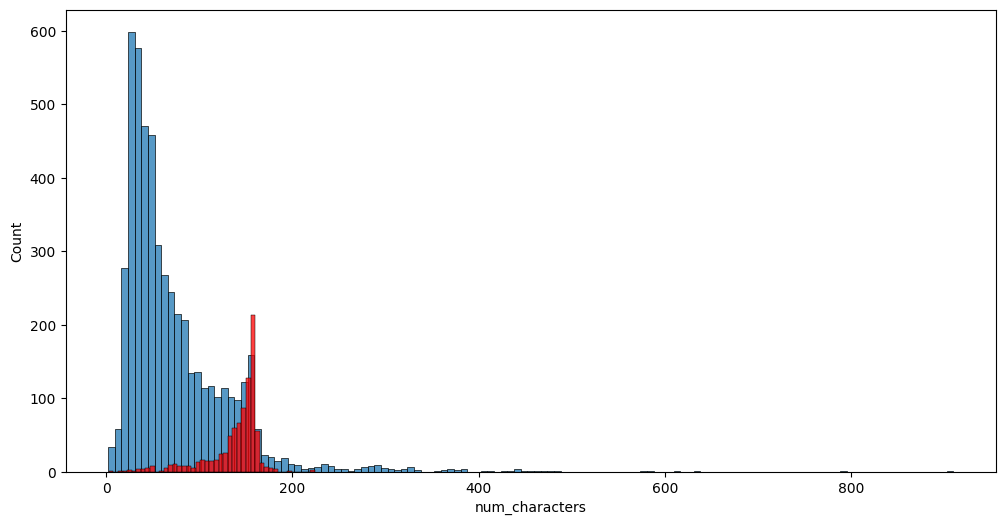

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

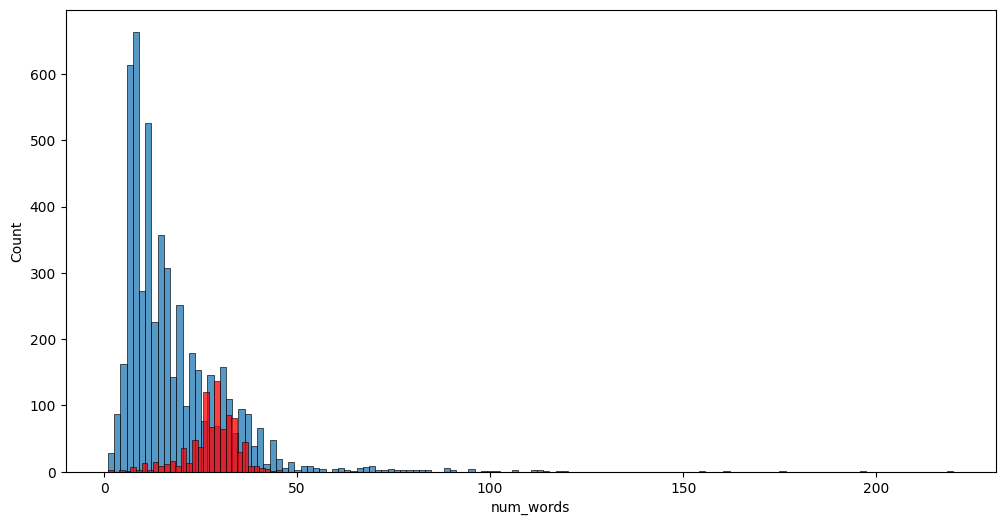

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<ipython-input-88-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

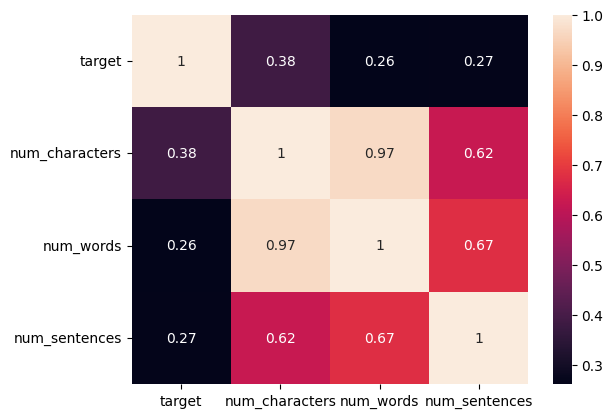

In [88]:
sns.heatmap(df.corr(),annot=True)

In [89]:
from nltk.corpus import stopwords

In [90]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [91]:
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [92]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [93]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [94]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [95]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [96]:
df['text'][10]

'Sure thing big man. i have hockey elections at 6, shouldn€˜t go on longer than an hour though'

In [97]:
df['transformed_text'] = df['text'].apply(transform_text)

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...


In [99]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [100]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

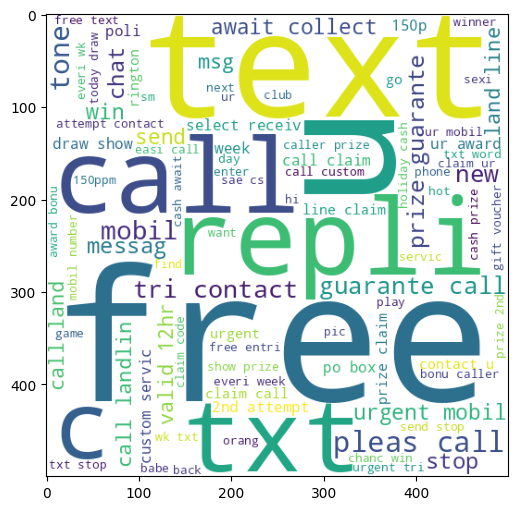

In [101]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [102]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


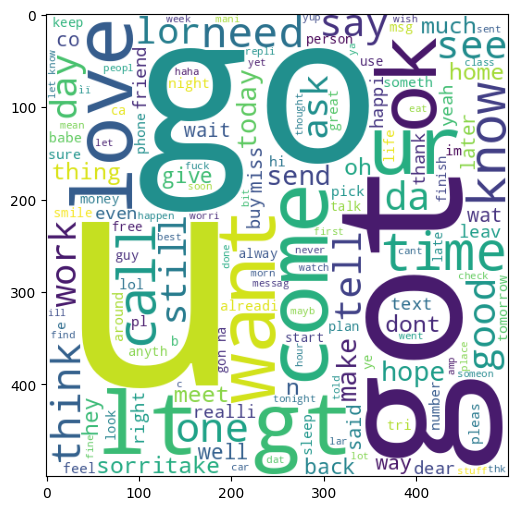

In [103]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [104]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...


In [105]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [106]:
len(spam_corpus)

13515

In [107]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

42563

In [108]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [109]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [110]:
y = df['target'].values

In [111]:
X.shape

(6068, 3000)

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [114]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8558484349258649
[[884 159]
 [ 16 155]]
0.49363057324840764


In [115]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9744645799011532
[[1041    2]
 [  29  142]]
0.9861111111111112


In [116]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9810543657331137
[[1040    3]
 [  20  151]]
0.9805194805194806


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [118]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [119]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [120]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [121]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9736408566721582, 0.9602649006622517)

In [122]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9736408566721582
Precision -  0.9602649006622517
For  KN
Accuracy -  0.9200988467874794
Precision -  1.0
For  NB
Accuracy -  0.9744645799011532
Precision -  0.9861111111111112
For  DT
Accuracy -  0.9332784184514004
Precision -  0.8169014084507042
For  LR
Accuracy -  0.957166392092257
Precision -  0.9343065693430657
For  RF
Accuracy -  0.9719934102141681
Precision -  0.9724137931034482
For  AdaBoost
Accuracy -  0.9678747940691927
Precision -  0.94
For  BgC
Accuracy -  0.9621087314662273
Precision -  0.8654970760233918
For  ETC
Accuracy -  0.9802306425041186
Precision -  0.9741935483870968
For  GBDT
Accuracy -  0.9530477759472817
Precision -  0.9453125
For  xgb
Accuracy -  0.9645799011532126
Precision -  0.9444444444444444


In [123]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [124]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.920099,1.000000
2,NB,0.974465,0.986111
8,ETC,0.980231,0.974194
5,RF,0.971993,0.972414
0,SVC,0.973641,0.960265
9,GBDT,0.953048,0.945312
10,xgb,0.964580,0.944444
6,AdaBoost,0.967875,0.940000
4,LR,0.957166,0.934307
7,BgC,0.962109,0.865497


In [125]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [126]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.920099
1,NB,Accuracy,0.974465
2,ETC,Accuracy,0.980231
3,RF,Accuracy,0.971993
4,SVC,Accuracy,0.973641
5,GBDT,Accuracy,0.953048
6,xgb,Accuracy,0.964580
7,AdaBoost,Accuracy,0.967875
8,LR,Accuracy,0.957166
9,BgC,Accuracy,0.962109


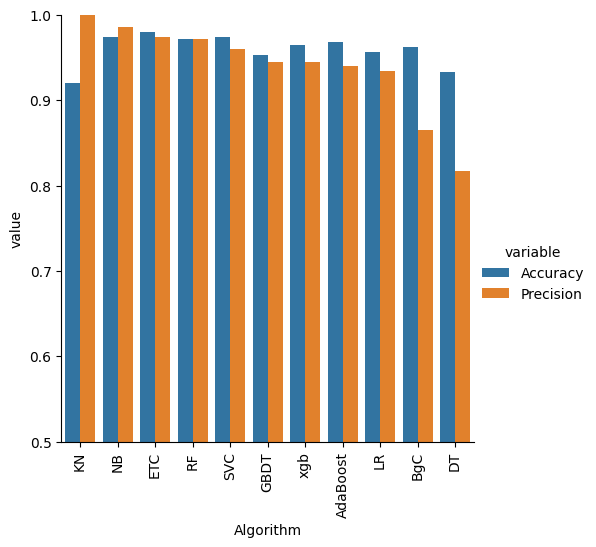

In [127]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [128]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [129]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [130]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [131]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [132]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [133]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.920099,1.000000,0.920099,1.000000,0.920099,1.000000,0.920099,1.000000
1,NB,0.974465,0.986111,0.974465,0.986111,0.974465,0.986111,0.974465,0.986111
2,ETC,0.980231,0.974194,0.980231,0.974194,0.980231,0.974194,0.980231,0.974194
3,RF,0.971993,0.972414,0.971993,0.972414,0.971993,0.972414,0.971993,0.972414
4,SVC,0.973641,0.960265,0.973641,0.960265,0.973641,0.960265,0.973641,0.960265
5,GBDT,0.953048,0.945312,0.953048,0.945312,0.953048,0.945312,0.953048,0.945312
6,xgb,0.964580,0.944444,0.964580,0.944444,0.964580,0.944444,0.964580,0.944444
7,AdaBoost,0.967875,0.940000,0.967875,0.940000,0.967875,0.940000,0.967875,0.940000
8,LR,0.957166,0.934307,0.957166,0.934307,0.957166,0.934307,0.957166,0.934307
9,BgC,0.962109,0.865497,0.962109,0.865497,0.962109,0.865497,0.962109,0.865497


In [134]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [135]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [136]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [137]:
(mnb.fit(X_train,y_train))

MultinomialNB()

In [138]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835255354200988
Precision 0.9870967741935484


In [139]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [140]:
from sklearn.ensemble import StackingClassifier

In [141]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [142]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.985996705107084
Precision 0.963855421686747


In [143]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))